In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# converting to binary data
df_one = pd.get_dummies(df["v1"])
# print(df_one)
  
# display result
df_two = pd.concat((df_one, df), axis=1)
df_two = df_two.drop(["v1"], axis=1)
df_two = df_two.drop(["ham"], axis=1)
df1 = df_two.rename(columns={"spam": "v1"})
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df1.drop("Unnamed: 3",inplace=True,axis=1)
df1.drop("Unnamed: 4",inplace=True,axis=1)
df1.drop("Unnamed: 2",inplace=True,axis=1)

df1.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<h3>Cleaning and Preparing text</h3>
<ul>
    <li>Cleaning links</li>
    <li>Cleaning digits except alphabetical and numeric characters</li>
    <li>Lowering</li>
    <li>Tokenising</li>
    <li>Lemmatizing and Removing Stop words</li>
    <li>Bag of words</li>
</ul>

<h3>Cleaning links</h3>
<p>There are links in the mail such as: <a>https://google.com.tr</a>. If we don't remove them they can cause problems.</p>
<p>To clean the following links, we can use Regex(regular) expression.A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern. Regular expressions are widely used in UNIX world. </p>

In [6]:
x = df1["v2"]
x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]

print(x_clnd_link[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


<h3>Cleaning digits except alphabetical and numeric characters</h3>
<p>As you can see from the text above, there are a lot of digits such as <b>*</b> and <b>:</b> They don't have a meaning, so we should remove them from the texts.

In order to clean unrelevant digits we'll use regex again.</p>

In [7]:
pattern = "[^a-zA-Z0-9]"



<p>-This helps to remove special characters</p>

In [8]:
#This means to replace all the characters following the pattern
x_cleaned = [re.sub(pattern, " ",text) for text in x_clnd_link]

print(x_cleaned[0])

Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   


<p><b>Now let's lower the texts, I won't add a section for it because it is a familiar process from the vanilla python.

</b></p>

In [9]:
x_lowered = [text.lower() for text in x_cleaned]

print(x_lowered[0])

go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   


<h3>Tokeninzing</h3>
<p>In order to create a feature that shows whether the text includes the word or not, we need to split words into lists, we can do this using pythonString.split() but there is a better function to do this in NLTK.

Let's tokenize the texts.</p>

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
x_tokenized = [nltk.word_tokenize(text) for text in x_lowered]

print(x_tokenized[0])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


<p>- Each sentence turned into a list that contains words.</p>

<h3>Lemmatizing and Removing Stopwords</h3>
<p>In natural languages, words can get additional so each word can have a lot of versions, sometimes these additionals may give tips to us but in filtering spams, we don't need them.There are two ways to remove additionals: <b>Stemmers and Lemmatizers</b> </p>

<h3>Stemmers</h3>
<p>Stemmers are rule based weak tools, they remove additionals using rules but in natural languages everything does not follow the rules. Also It cant change tenses, for instance lemmatizers convert learnt into learn, stemmers don't touch them. Although stemmers are weak they are fast and although so many natural language do not have lemmatizers most of them have stemmers.</p>

<h3>Lemmatizers</h3>
<p>Lemmatizers uses dictionaries to remove additionals and change tenses. They work good but developing a lemmatizer is hard and needs a lot of resource, so they are rare. Also lemmatizers use dictionaries, and that causes lemmatizers being slow.

In this kernel we'll use NLTK's WordNet Lemmatizer. WordNet is a big dictionary.</p>


In [12]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


<p>- Now, we can easily use lemmatizer</p>

In [13]:
words = ["pets","bats","cats","removed","beers","went","stopped","studied"]
for word in words:
    print(lemma.lemmatize(word), end=" ")

pet bat cat removed beer went stopped studied 

<p>- We can now lemmatize our tokenized text</p>

In [14]:
x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]

print(x_lemmatized[0])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


<h3>Removing Stopwords</h3>
<p>In natural languages there are words that not have a special meaning such as <b>will</b>, it is always a tense and such as <b>and,or</b>

In order to win from time and improve the model we should remove them. There are several ways to remove them but in this kernel we'll use stopwords corpora of NLTK. There are stopwords of 11 natural language in there.</p>

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stopwords = nltk.corpus.stopwords.words('english')
x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]

print(x_prepared[0])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']


<p>Let's see the unique words of our dataset</p>

<h3>Bag of words</h3>
<p>And we came to the final process of this section: Bag of Words. Bag of Words is an easy approach to make sense of texts.</p>

In [17]:
vectorizer = CountVectorizer(max_features=20000)
x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()

In [18]:
x.shape

(5572, 7935)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_prepared,np.asarray(df1["v1"]),random_state=42,test_size=0.2)

In [20]:
y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

# Play around with Word2vector

In [21]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-05-19 08:58:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-19 08:58:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-19 08:58:15--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [22]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [23]:
!python -m gensim.scripts.glove2word2vec -i glove.6B.300d.txt -o glove.6B.300d.word2vec.txt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'gensim.scripts.glove2word2vec' found in sys.modules after import of package 'gensim.scripts', but prior to execution of 'gensim.scripts.glove2word2vec'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-05-19 09:01:29,277 - glove2word2vec - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/glove2word2vec.py -i glove.6B.300d.txt -o glove.6B.300d.word2vec.txt
2021-05-19 09:01:29,828 - glove2word2vec - INFO - converting 400000 vectors from glove.6B.300d.txt to glove.6B.300d.word2vec.txt
2021-05-19 09:01:50,256 - glove2word2vec - INFO - Converted model with 400000 vectors and 300 dimensions


In [24]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from gensim.models import KeyedVectors

w2v = KeyedVectors.load_word2vec_format('glove.6B.300d.word2vec.txt',binary=False)

In [26]:
w2v.most_similar('king')

[('queen', 0.6336469054222107),
 ('prince', 0.619662344455719),
 ('monarch', 0.5899620652198792),
 ('kingdom', 0.5791267156600952),
 ('throne', 0.5606487989425659),
 ('ii', 0.5562329888343811),
 ('iii', 0.5503199100494385),
 ('crown', 0.5224862694740295),
 ('reign', 0.521735429763794),
 ('kings', 0.5066401362419128)]

In [27]:
# King + Woman - Man = ?
w2v.most_similar(['king','woman'],negative=['man'],topn=1)

[('queen', 0.6713277101516724)]

In [28]:
w2v.doesnt_match("england china vietnam laos".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'england'

## Use Glove Pretrain

In [29]:
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout,GRU, Activation ,Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers


In [30]:
maxlen = 2000
max_features = 7098

In [31]:
EMBEDDING_FILE = 'glove.6B.300d.txt'
tokenizer = Tokenizer(num_words=max_features)

In [32]:
tokenizer.fit_on_texts(x_train)

In [33]:
x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features = pad_sequences(x_train_features,maxlen=maxlen)
x_test_features = pad_sequences(x_test_features,maxlen=maxlen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [34]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [35]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(GRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2000)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 2000, 300)         2129400   
_________________________________________________________________
bidirectional (Bidirectional (None, 2000, 128)         140544    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17    

In [36]:
model.layers[1].trainable = False

In [37]:
print(x_train_features)

[[   0    0    0 ...  219  264 1746]
 [   0    0    0 ...  124  865  146]
 [   0    0    0 ...  254 3368 3369]
 ...
 [   0    0    0 ...  543  153 1807]
 [   0    0    0 ... 1470  996  171]
 [   0    0    0 ...   82   26   65]]


In [38]:
history = model.fit(x_train_features,y_train, batch_size=512, epochs=20, 
          validation_data=(x_test_features, y_test))

Epoch 1/20
9/9 [==============================] - 46s 1s/step - loss: 0.6234 - accuracy: 0.5910 - val_loss: 0.3375 - val_accuracy: 0.8655
Epoch 2/20
9/9 [==============================] - 10s 1s/step - loss: 0.3459 - accuracy: 0.8652 - val_loss: 0.2954 - val_accuracy: 0.8655
Epoch 3/20
9/9 [==============================] - 10s 1s/step - loss: 0.2952 - accuracy: 0.8676 - val_loss: 0.2259 - val_accuracy: 0.8655
Epoch 4/20
9/9 [==============================] - 10s 1s/step - loss: 0.2287 - accuracy: 0.8765 - val_loss: 0.1644 - val_accuracy: 0.9623
Epoch 5/20
9/9 [==============================] - 10s 1s/step - loss: 0.1578 - accuracy: 0.9658 - val_loss: 0.1183 - val_accuracy: 0.9677
Epoch 6/20
9/9 [==============================] - 10s 1s/step - loss: 0.1044 - accuracy: 0.9723 - val_loss: 0.0866 - val_accuracy: 0.9695
Epoch 7/20
9/9 [==============================] - 10s 1s/step - loss: 0.0768 - accuracy: 0.9818 - val_loss: 0.0731 - val_accuracy: 0.9767
Epoch 8/20
9/9 [==================

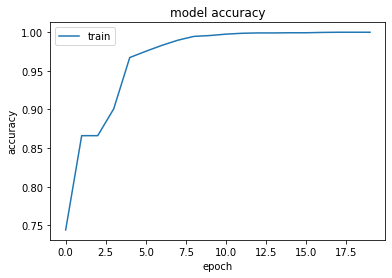

In [39]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
w2v.doesnt_match("fish shark cat whale".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cat'

# Neural Network w Embedding From Scratch

In [41]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,GRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [42]:
## some config values 
embed_size = 100 # how big is each word vector
max_feature = 50000 # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

In [43]:
tokenizer = Tokenizer(num_words=max_feature)

In [44]:
tokenizer.fit_on_texts(x_train)

In [45]:
x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [46]:
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)

In [47]:
embed_size = 100

inp = Input(shape=(max_len,))
x = Embedding(max_feature, embed_size)(inp)
x = Bidirectional(GRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2000)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 2000, 100)         5000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 2000, 128)         63744     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17  

In [57]:
history = model.fit(x_train_features, y_train, batch_size=512, epochs=20, validation_data=(x_test_features, y_test))

Epoch 1/20
9/9 [==============================] - 6s 619ms/step - loss: 0.2462 - accuracy: 0.8674 - val_loss: 0.2043 - val_accuracy: 0.8933
Epoch 2/20
9/9 [==============================] - 6s 626ms/step - loss: 0.1651 - accuracy: 0.9392 - val_loss: 0.1445 - val_accuracy: 0.9641
Epoch 3/20
9/9 [==============================] - 6s 622ms/step - loss: 0.1120 - accuracy: 0.9711 - val_loss: 0.1175 - val_accuracy: 0.9758
Epoch 4/20
9/9 [==============================] - 6s 627ms/step - loss: 0.0766 - accuracy: 0.9816 - val_loss: 0.0891 - val_accuracy: 0.9874
Epoch 5/20
9/9 [==============================] - 6s 631ms/step - loss: 0.0472 - accuracy: 0.9926 - val_loss: 0.0745 - val_accuracy: 0.9812
Epoch 6/20
9/9 [==============================] - 6s 629ms/step - loss: 0.0312 - accuracy: 0.9919 - val_loss: 0.0769 - val_accuracy: 0.9821
Epoch 7/20
9/9 [==============================] - 6s 631ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.0697 - val_accuracy: 0.9901
Epoch 8/20
9/9 [====

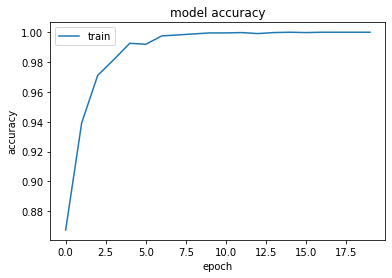

In [58]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Neural Network

In [59]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [60]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

In [61]:
confusion_matrix(y_test,y_predict)

array([[963,   2],
       [ 12, 138]])

In [62]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()

In [63]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))

Precision: 98.57%
Recall: 92.00%


In [64]:
f1_score(y_test,y_predict)

0.9517241379310346

## Error Analysis

### Plot confusion matrix

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot normalized confusion matrix

Confusion matrix, without normalization
[[963   2]
 [ 12 138]]


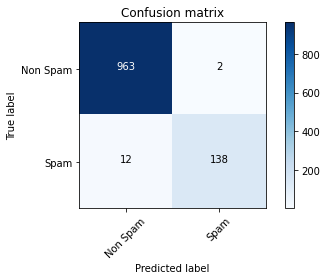

In [66]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')